In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data WL daily.xlsx")
df.head()

,date,Average(m)
0,2000-01-01,1.62
1,2000-01-02,1.67
2,2000-01-03,1.55
3,2000-01-04,1.65
4,2000-01-05,1.79


In [3]:
df.tail()

,date,Average(m)
3509,2009-12-27,1.59
3510,2009-12-28,1.59
3511,2009-12-29,1.55
3512,2009-12-30,1.60
3513,2009-12-31,1.73


In [4]:
df_2 = df.rename(columns ={'date':'ds','Average(m)':'y'})
df_2.head()

,ds,y
0,2000-01-01,1.62
1,2000-01-02,1.67
2,2000-01-03,1.55
3,2000-01-04,1.65
4,2000-01-05,1.79


In [5]:
df_2.tail()

,ds,y
3509,2009-12-27,1.59
3510,2009-12-28,1.59
3511,2009-12-29,1.55
3512,2009-12-30,1.60
3513,2009-12-31,1.73


In [6]:
df_2.isnull().any()

ds    False
y     False
dtype: bool

In [7]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [8]:
model = Prophet()

In [9]:
model.fit(df_2)

20:49:20 - cmdstanpy - INFO - Chain [1] start processing
20:49:24 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [11]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3874,2010-12-27
3875,2010-12-28
3876,2010-12-29
3877,2010-12-30
3878,2010-12-31


In [12]:
future.tail()

,ds
3874,2010-12-27
3875,2010-12-28
3876,2010-12-29
3877,2010-12-30
3878,2010-12-31


In [13]:
forecast = model.predict(future)

In [14]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,3.281116,1.561464,2.333530,3.281116,3.281116,-1.342604,-1.342604,-1.342604,0.001270,0.001270,0.001270,-1.343874,-1.343874,-1.343874,0.0,0.0,0.0,1.938511
1,2000-01-02,3.281357,1.493208,2.331694,3.281357,3.281357,-1.359806,-1.359806,-1.359806,-0.002677,-0.002677,-0.002677,-1.357129,-1.357129,-1.357129,0.0,0.0,0.0,1.921551
2,2000-01-03,3.281599,1.497539,2.302333,3.281599,3.281599,-1.372230,-1.372230,-1.372230,-0.002361,-0.002361,-0.002361,-1.369868,-1.369868,-1.369868,0.0,0.0,0.0,1.909370
3,2000-01-04,3.281841,1.509326,2.319670,3.281841,3.281841,-1.383880,-1.383880,-1.383880,-0.001776,-0.001776,-0.001776,-1.382104,-1.382104,-1.382104,0.0,0.0,0.0,1.897961
4,2000-01-05,3.282083,1.503852,2.291980,3.282083,3.282083,-1.393871,-1.393871,-1.393871,-0.000020,-0.000020,-0.000020,-1.393851,-1.393851,-1.393851,0.0,0.0,0.0,1.888211


In [15]:
forecast[['ds','yhat']].head()

,ds,yhat
0,2000-01-01,1.938511
1,2000-01-02,1.921551
2,2000-01-03,1.909370
3,2000-01-04,1.897961
4,2000-01-05,1.888211


In [16]:
forecast[['ds','yhat']].tail()

,ds,yhat
3874,2010-12-27,1.250060
3875,2010-12-28,1.234304
3876,2010-12-29,1.220230
3877,2010-12-30,1.206964
3878,2010-12-31,1.193707


C:\Users\MD. MASUD RANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\MD. MASUD RANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


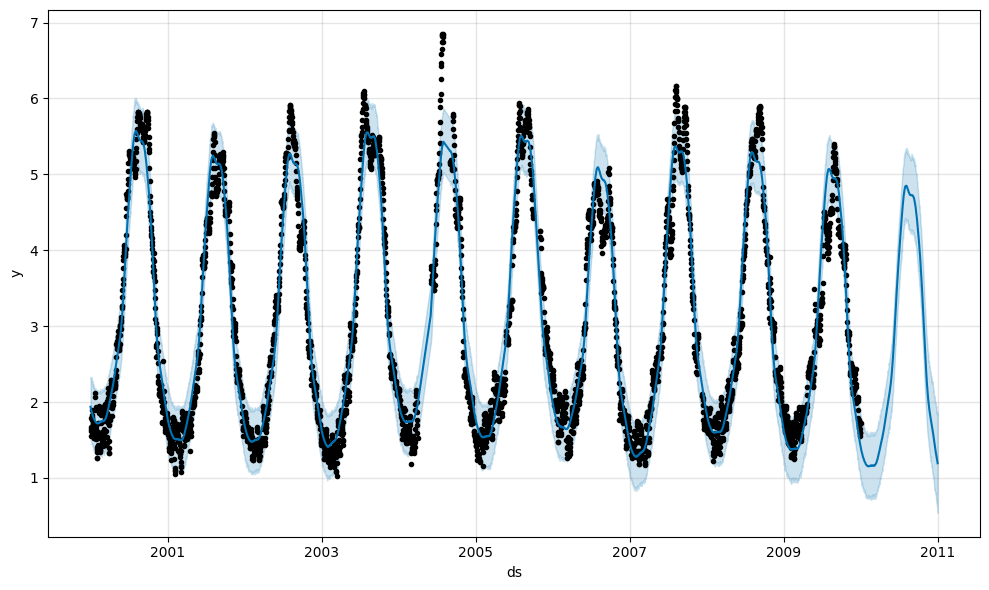

In [17]:
fig1 = model.plot(forecast)

C:\Users\MD. MASUD RANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\MD. MASUD RANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\MD. MASUD RANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

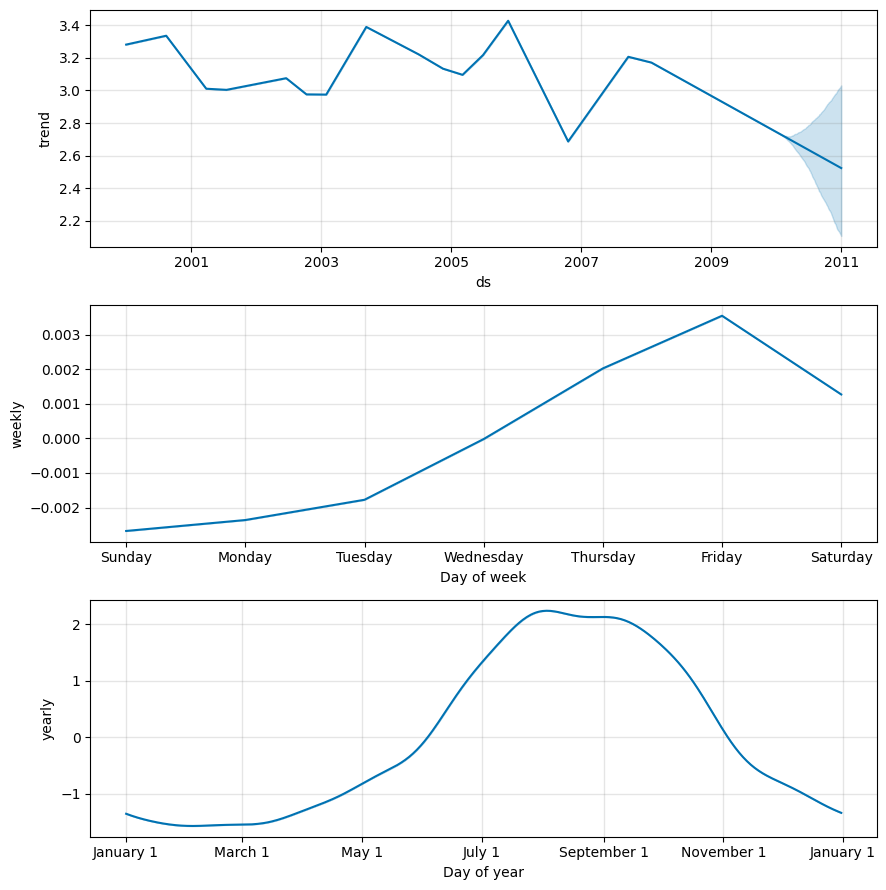

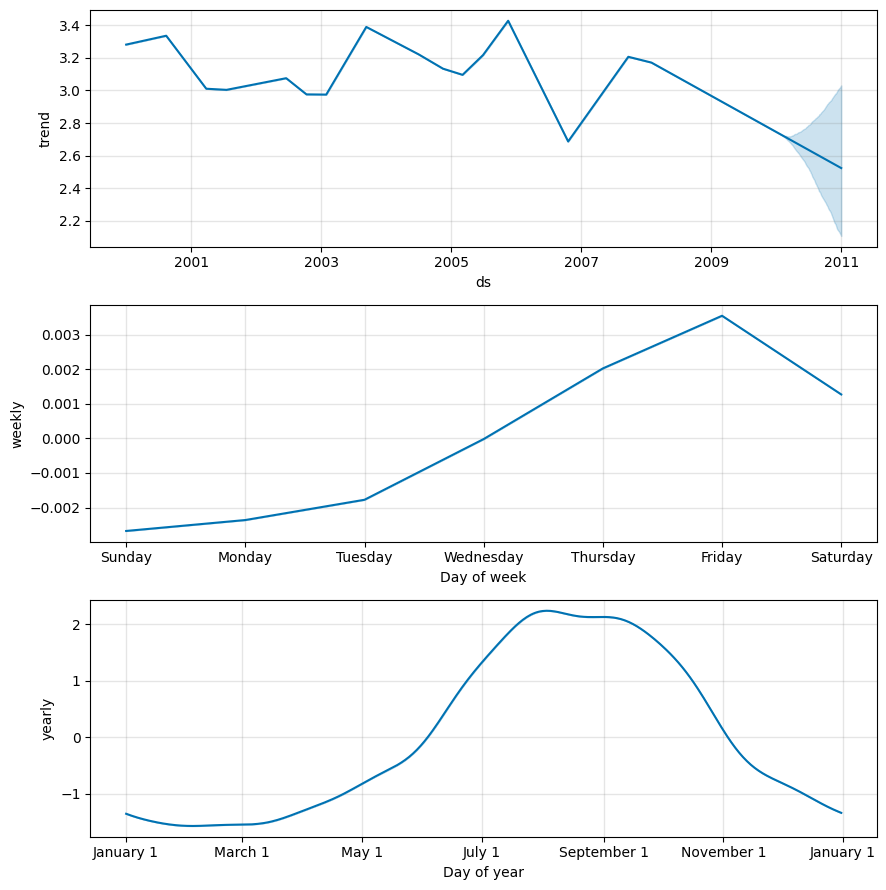

In [18]:
model.plot_components(forecast)

In [19]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [20]:
df_cv = cross_validation(model, initial='3284 days', period='365 days', horizon='365 days')


  0%|          | 0/1 [00:00<?, ?it/s]

20:49:31 - cmdstanpy - INFO - Chain [1] start processing
20:49:34 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-01-01,1.750282,1.343672,2.127000,1.82,2008-12-31
1,2009-01-02,1.739615,1.374915,2.108923,1.77,2008-12-31
2,2009-01-03,1.725715,1.322722,2.115929,1.69,2008-12-31
3,2009-01-04,1.708532,1.317064,2.103362,1.60,2008-12-31
4,2009-01-05,1.696184,1.314129,2.081790,1.63,2008-12-31


In [22]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
360,2009-12-27,1.877762,1.149921,2.601222,1.59,2008-12-31
361,2009-12-28,1.862821,1.183794,2.539873,1.59,2008-12-31
362,2009-12-29,1.847602,1.138645,2.553603,1.55,2008-12-31
363,2009-12-30,1.834881,1.091037,2.556901,1.60,2008-12-31
364,2009-12-31,1.822597,1.112821,2.555324,1.73,2008-12-31


In [23]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.023006,0.151678,0.125835,0.076296,0.070092,0.077385,1.0
1,37 days,0.024814,0.157524,0.131244,0.080971,0.071727,0.081501,1.0
2,38 days,0.026310,0.162204,0.136902,0.085457,0.073593,0.085577,1.0
3,39 days,0.026746,0.163541,0.139527,0.087435,0.076612,0.087447,1.0
4,40 days,0.026430,0.162574,0.137091,0.085932,0.076612,0.086003,1.0


In [24]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
325,361 days,0.036534,0.191140,0.164293,0.082633,0.072650,0.078849,1.0
326,362 days,0.036130,0.190078,0.163585,0.083615,0.072650,0.079696,1.0
327,363 days,0.035079,0.187293,0.161975,0.084268,0.072650,0.080245,1.0
328,364 days,0.033889,0.184090,0.159804,0.084263,0.072650,0.080241,1.0
329,365 days,0.031397,0.177191,0.153667,0.081622,0.070337,0.077847,1.0
